# Plot results for article

In [1]:
from tensorflow.compat.v1.train import summary_iterator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import FormatStrFormatter

We extract our results from tensorboard logs.

In [2]:
TAGS_OF_INTEREST = {"epoch", "train_comp_accuracy", "val_comp_accuracy"}

def get_df_from_eventsfile(eventsfile_path):
    results = {}
    for e in summary_iterator(eventsfile_path):
        if len(e.summary.value) > 0 and e.summary.value[0].tag in TAGS_OF_INTEREST:
            if e.step in results:
                results[e.step][e.summary.value[0].tag] = e.summary.value[0].simple_value
            else:
                results[e.step] = {e.summary.value[0].tag: e.summary.value[0].simple_value}
    
    df = pd.DataFrame(results).transpose()
    return df

def get_tfevents_files_in_folder(folder_path):
    file_paths = []
    for root, _, files in os.walk(folder_path, topdown=False):
        for name in files:
            if name.startswith("events.out.tfevents"):
                file_paths.append(os.path.join(root, name))
    return file_paths

def get_exp_num(eventsfile_path):
    start_ix = eventsfile_path.index("exp=")
    end_ix = eventsfile_path.index("/", start_ix)
    return int(eventsfile_path[start_ix+4:end_ix])

def get_version_num(eventsfile_path):
    start_ix = eventsfile_path.index("v_")
    end_ix = eventsfile_path.index("/", start_ix)
    version_num = eventsfile_path[start_ix+2:end_ix]
    if "_" in version_num:
        main_version_num = int(version_num.split("_")[0])
        sub_version_num = int(version_num.split("_")[1])
    else:
        main_version_num = int(version_num)
        sub_version_num = None
    return main_version_num, sub_version_num


Different experiment numbers from the already obtained data are mapped to model names.

In [3]:
TRAIN_SET_RATIO = [0.01, 0.05, 0.1, 0.2]
EMBEDDING = {"2": None, "10": "VisualBERT", "11": "UNITER", "15": "LXMERT", "16": "LXMERT", "18": "LXMERT"}
STREAM_TYPE = {"2": "single", "10": "single", "11": "single", "15": "dual", "16": "single", "18": "single"}
MODEL_NAME = {"2": "GPT2text", "10": "VisualBERT", "11": "UNITER", "15": "LXMERTd", "16": "LXMERTs", "18": "LXMERTb"} 
COMMENT = {"2": "text"}

df = pd.DataFrame()

Extract model results data from logs for all models.

In [4]:
exp = "2"
events_files = get_tfevents_files_in_folder("final_exp="+exp)
results_entries = []
for file in events_files:
    tmp_df = get_df_from_eventsfile(file)
    best_entry = tmp_df.iloc[tmp_df.val_comp_accuracy.argmax()].to_dict()
    best_entry["exp"] = get_exp_num(file)
    best_entry["version"], best_entry["sub_version"] = get_version_num(file)
    best_entry["train_set_ratio"] = TRAIN_SET_RATIO[best_entry["version"]]
    best_entry["embedding"] = EMBEDDING[exp]
    best_entry["stream_type"] = STREAM_TYPE[exp]
    best_entry["comment"] = COMMENT[exp] if exp in COMMENT else None
    best_entry["model_name"] = MODEL_NAME[exp]
    best_entry["model_name_again"] = MODEL_NAME[exp]

    results_entries.append(best_entry)

df = pd.concat((df, pd.DataFrame(results_entries).sort_values(["exp","version"]).reset_index(drop=True)))


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [5]:
exp = "10"
events_files = get_tfevents_files_in_folder("final_exp="+exp)
results_entries = []
for file in events_files:
    tmp_df = get_df_from_eventsfile(file)
    best_entry = tmp_df.iloc[tmp_df.val_comp_accuracy.argmax()].to_dict()
    best_entry["exp"] = get_exp_num(file)
    best_entry["version"], best_entry["sub_version"] = get_version_num(file)
    best_entry["train_set_ratio"] = TRAIN_SET_RATIO[best_entry["version"]]
    best_entry["embedding"] = EMBEDDING[exp]
    best_entry["stream_type"] = STREAM_TYPE[exp]
    best_entry["comment"] = COMMENT[exp] if exp in COMMENT else None
    best_entry["model_name"] = MODEL_NAME[exp]
    best_entry["model_name_again"] = MODEL_NAME[exp]

    results_entries.append(best_entry)

df = pd.concat((df, pd.DataFrame(results_entries).sort_values(["exp","version"]).reset_index(drop=True)))

In [6]:
exp = "11"
events_files = get_tfevents_files_in_folder("final_exp="+exp)
results_entries = []
for file in events_files:
    tmp_df = get_df_from_eventsfile(file)
    best_entry = tmp_df.iloc[tmp_df.val_comp_accuracy.argmax()].to_dict()
    best_entry["exp"] = get_exp_num(file)
    best_entry["version"], best_entry["sub_version"] = get_version_num(file)
    best_entry["train_set_ratio"] = TRAIN_SET_RATIO[best_entry["version"]]
    best_entry["embedding"] = EMBEDDING[exp]
    best_entry["stream_type"] = STREAM_TYPE[exp]
    best_entry["comment"] = COMMENT[exp] if exp in COMMENT else None
    best_entry["model_name"] = MODEL_NAME[exp]
    best_entry["model_name_again"] = MODEL_NAME[exp]

    results_entries.append(best_entry)

df = pd.concat((df, pd.DataFrame(results_entries).sort_values(["exp","version"]).reset_index(drop=True)))


In [7]:
exp = "15"
events_files = get_tfevents_files_in_folder("final_exp="+exp)
results_entries = []
for file in events_files:
    tmp_df = get_df_from_eventsfile(file)
    best_entry = tmp_df.iloc[tmp_df.val_comp_accuracy.argmax()].to_dict()
    best_entry["exp"] = get_exp_num(file)
    best_entry["version"], best_entry["sub_version"] = get_version_num(file)
    best_entry["train_set_ratio"] = TRAIN_SET_RATIO[best_entry["version"]]
    best_entry["embedding"] = EMBEDDING[exp]
    best_entry["stream_type"] = STREAM_TYPE[exp]
    best_entry["comment"] = COMMENT[exp] if exp in COMMENT else None
    best_entry["model_name"] = MODEL_NAME[exp]
    best_entry["model_name_again"] = MODEL_NAME[exp]

    results_entries.append(best_entry)

df = pd.concat((df, pd.DataFrame(results_entries).sort_values(["exp","version"]).reset_index(drop=True)))


In [8]:
exp = "16"
events_files = get_tfevents_files_in_folder("final_exp="+exp)
results_entries = []
for file in events_files:
    tmp_df = get_df_from_eventsfile(file)
    best_entry = tmp_df.iloc[tmp_df.val_comp_accuracy.argmax()].to_dict()
    best_entry["exp"] = get_exp_num(file)
    best_entry["version"], best_entry["sub_version"] = get_version_num(file)
    best_entry["train_set_ratio"] = TRAIN_SET_RATIO[best_entry["version"]]
    best_entry["embedding"] = EMBEDDING[exp]
    best_entry["stream_type"] = STREAM_TYPE[exp]
    best_entry["comment"] = COMMENT[exp] if exp in COMMENT else None
    best_entry["model_name"] = MODEL_NAME[exp]
    best_entry["model_name_again"] = MODEL_NAME[exp]

    results_entries.append(best_entry)

df = pd.concat((df, pd.DataFrame(results_entries).sort_values(["exp","version"]).reset_index(drop=True)))


In [9]:
exp = "18"
events_files = get_tfevents_files_in_folder("final_exp="+exp)
results_entries = []
for file in events_files:
    tmp_df = get_df_from_eventsfile(file)
    best_entry = tmp_df.iloc[tmp_df.val_comp_accuracy.argmax()].to_dict()
    best_entry["exp"] = get_exp_num(file)
    best_entry["version"], best_entry["sub_version"] = get_version_num(file)
    best_entry["train_set_ratio"] = TRAIN_SET_RATIO[best_entry["version"]]
    best_entry["embedding"] = EMBEDDING[exp]
    best_entry["stream_type"] = STREAM_TYPE[exp]
    best_entry["comment"] = COMMENT[exp] if exp in COMMENT else None
    best_entry["model_name"] = MODEL_NAME[exp]
    best_entry["model_name_again"] = MODEL_NAME[exp]

    results_entries.append(best_entry)

df = pd.concat((df, pd.DataFrame(results_entries).sort_values(["exp","version"]).reset_index(drop=True)))


Plot final results

In [10]:
sns.set(font_scale=0.7)
sns.set_style("ticks", {"font.family": "serif", 'axes.grid': True})

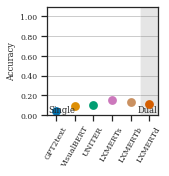

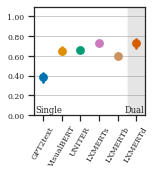

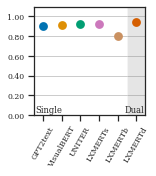

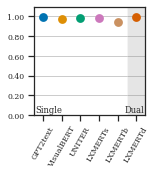

In [13]:
train_set_ratios = [0.01, 0.05, 0.1, 0.2]
text_offset = [0.0001, 0.012, 0.0015, -0.002]

for i, train_set_ratio in enumerate(train_set_ratios):
    plt.figure(figsize=(2,2))
    order = ["GPT2text", "VisualBERT", "UNITER", "LXMERTs", "LXMERTb", "LXMERTd"] #["GPT2text", "VisualBERT", "UNITER" "LXMERTs", "LXMERTbad", "LXMERTd"]
    ax = sns.pointplot(data=df[df["train_set_ratio"]==train_set_ratio], order=order, x="model_name", palette='colorblind', y="val_comp_accuracy", hue="model_name", ci="sd")
    ax.get_legend().remove()
    ax.axvspan(xmin=4.5, xmax=5.5, facecolor="grey", alpha=0.2)
    plt.xlim([-0.5,5.5])
    plt.ylim([0, 1.1])
    ylim = ax.get_ylim()
    plt.text(x=-0.45, y=ylim[0]+0.03, s="Single")
    plt.text(x=4.4, y=ylim[0]+0.03, s="Dual")
    plt.setp(ax.get_xticklabels(), rotation=60)

    labels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels(labels)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    if i==0:
        plt.ylabel("Accuracy")
    else:
        plt.ylabel("")
    plt.xlabel("")
    figname = "../images/" + "ratio_" + str(train_set_ratio).replace(".", "_") + ".pdf"
    plt.savefig(figname, bbox_inches="tight", pad_inches = 0)